In [37]:
import numpy as np
from skimage.transform import SimilarityTransform
from skimage.transform import warp, AffineTransform
from skimage.measure import ransac

points = np.loadtxt('/Users/kmarsh/Code/kmarsh/autogeoreferencer/data/OH-Champaign-72-01.csv', delimiter=',', usecols=(0, 1))
intersections = np.loadtxt('/Users/kmarsh/Code/kmarsh/autogeoreferencer/data/39021-intersections-3857.psv', delimiter='|')

pts = 12
rng = np.random.default_rng()
points = rng.choice(points, pts)
intersections = rng.choice(points, pts)

# robustly estimate affine transform model with RANSAC
model_robust, inliers = ransac((points, intersections), AffineTransform, min_samples=3,
                               residual_threshold=2, max_trials=10000)
outliers = inliers == False

print(model_robust)

<AffineTransform(matrix=
    [[-5.34105276e-01, -2.84907477e-01,  2.71488249e+03],
     [ 4.96557426e-01, -1.18516210e-01,  4.18191607e+02],
     [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])>


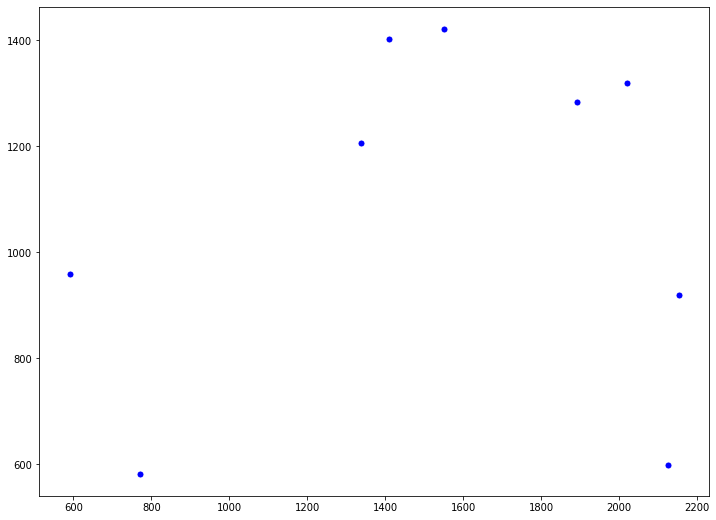

In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.scatter(points[:,0], points[:,1], color='blue', edgecolor='white', s=50)
plt.show()

In [33]:
model_robust([1634, 1194])

array([[1756.8387632 , 1085.77122457]])